# Analisis Visual

### **Juan Jose Gini Becker**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
nombre_archivo = '../data/retail_sales_dataset.csv'

df = pd.read_csv(nombre_archivo)
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:

df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB


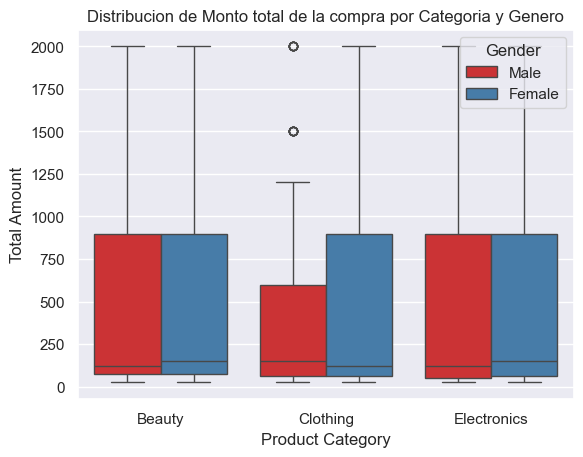

In [5]:
sns.set_theme()

sns.boxplot(data=df,
            x='Product Category',
            y='Total Amount',
            hue='Gender',
            palette='Set1')

plt.title('Distribucion de Monto total de la compra por Categoria y Genero')
plt.show()

In [6]:
# Calcular el promedio de monto total de ventas por mes y por categoria

df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

temp_df = df[['Product Category', 'Total Amount', 'Year', 'Month']].groupby(['Year', 'Month', 'Product Category']).mean().round(2).reset_index()
temp_df

temp_df['Date'] = pd.to_datetime(temp_df['Month'].astype(str) + '-' + temp_df['Year'].astype(str), format='%m-%Y')

temp_df.drop(columns=['Year', 'Month'], inplace=True)

temp_df.head()

,Product Category,Total Amount,Date
0,Beauty,497.20,2023-01-01
1,Clothing,504.81,2023-01-01
2,Electronics,395.80,2023-01-01
3,Beauty,539.81,2023-02-01
4,Clothing,441.21,2023-02-01


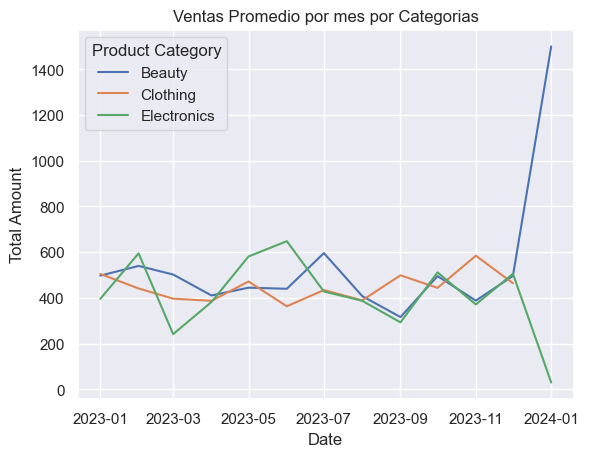

In [7]:
sns.lineplot(data=temp_df,
             x='Date',
             y='Total Amount',
             hue='Product Category')

plt.title('Ventas Promedio por mes por Categorias')
plt.show()

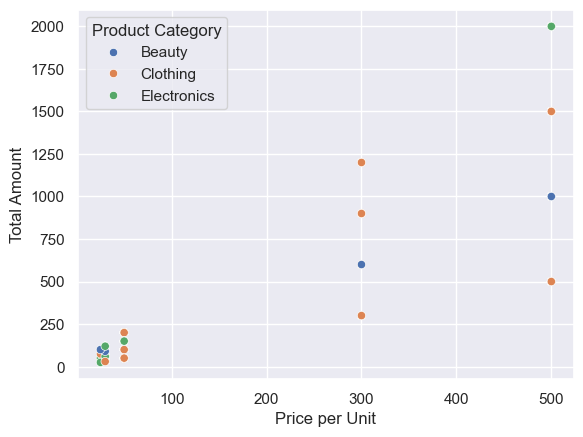

In [8]:
sns.scatterplot(data=df,
                x='Price per Unit',
                y='Total Amount',
                hue='Product Category')

plt.show()

In [13]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,11,2023
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2,2023
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,1,2023
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,5,2023
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,5,2023


In [15]:
# Analisis de Correlacion y mapa de calor

# Seleccionar solo las variables numericas
columnas_numericas = df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]

# Calculo de la correlacion

correlation_matrix = columnas_numericas.corr(method='pearson')

correlation_matrix

,Age,Quantity,Price per Unit,Total Amount
Age,1.000000,-0.023737,-0.038423,-0.060568
Quantity,-0.023737,1.000000,0.017501,0.373707
Price per Unit,-0.038423,0.017501,1.000000,0.851925
Total Amount,-0.060568,0.373707,0.851925,1.000000


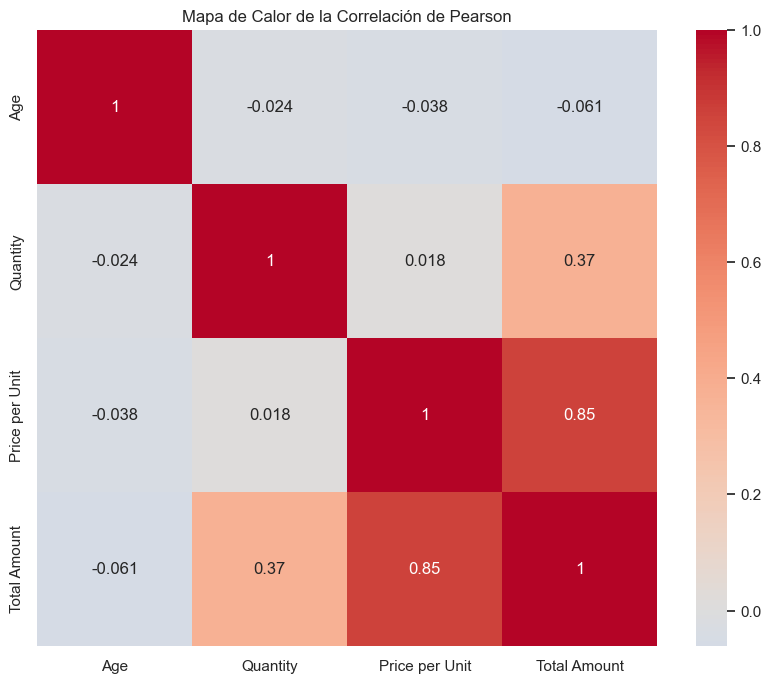

In [16]:
# Crear un mapa de calor para la matriz de correlación de Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

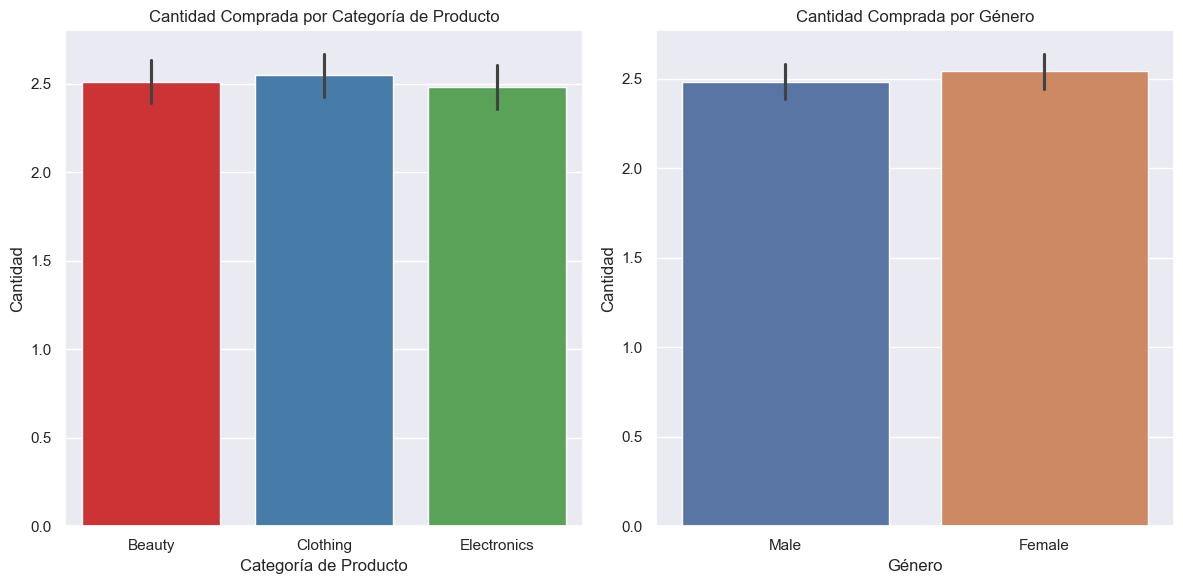

In [20]:
# Crear un gráfico de subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de barras de cantidad por categoría de producto
sns.barplot(x='Product Category', y='Quantity', hue='Product Category', data=df, ax=axs[0], palette='Set1')
axs[0].set_title('Cantidad Comprada por Categoría de Producto')
axs[0].set_xlabel('Categoría de Producto')
axs[0].set_ylabel('Cantidad')

# Gráfico de barras de cantidad por género
sns.barplot(x='Gender', y='Quantity',hue='Gender', data=df, ax=axs[1])
axs[1].set_title('Cantidad Comprada por Género')
axs[1].set_xlabel('Género')
axs[1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()
